<a href="https://colab.research.google.com/github/DanielaLFreire/imagesearchengine/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load packages

In [119]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [89]:
output_path='/content/drive/MyDrive/Colab Notebooks/'

In [41]:
df_duration_resnet50 = pd.read_csv(output_path+'acc_resnet50.csv', names = ['ResNet50'], sep="\t")
df_acc_vgg16 = pd.read_csv(output_path+'acc_vgg16.csv',  names = ['Vgg16'],sep="\t")
df_acc_mobilenet = pd.read_csv(output_path+'acc_mobilenet.csv', names = ['MobileNet'],sep="\t")
df_acc_mobilenetv2 = pd.read_csv(output_path+'acc_mobilenetv2.csv',names = ['MobileNetV2'],sep="\t")

df_acc_hog = pd.read_csv(output_path+'acc_hog.csv',  names = ['HOG'],sep="\t")
df_acc_lbp = pd.read_csv(output_path+'acc_lbp.csv', names = ['LBP'],sep="\t")
df_acc_orb = pd.read_csv(output_path+'acc_orb.csv',names = ['ORB'],sep="\t")

df_acc = pd.concat([df_acc_resnet50, df_acc_vgg16,df_acc_mobilenet,df_acc_mobilenetv2, df_acc_hog, df_acc_lbp, df_acc_orb ], axis=1, join="inner")

In [109]:
df_acc

,ResNet50,Vgg16,MobileNet,MobileNetV2,HOG,LBP,ORB
0,0.861659,0.853828,0.868619,0.868329,0.765371,0.765371,0.75029
1,0.859629,0.854698,0.868910,0.868039,0.765371,0.765371,0.75029
2,0.859919,0.852958,0.868910,0.867749,0.765371,0.765371,0.75029
3,0.860499,0.854698,0.867459,0.868619,0.765371,0.765371,0.75029
4,0.859339,0.853828,0.866879,0.866879,0.765371,0.765371,0.75029
5,0.859339,0.854988,0.868039,0.867459,0.765371,0.765371,0.75029
6,0.859629,0.854698,0.868039,0.868619,0.765371,0.765371,0.75029
7,0.859339,0.855568,0.867169,0.867169,0.765371,0.765371,0.75029
8,0.858469,0.854698,0.867459,0.867749,0.765371,0.765371,0.75029
9,0.859629,0.854408,0.867749,0.867459,0.765371,0.765371,0.75029


Generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the difference between different treatments

In [ ]:
plt.figure(figsize=(10, 7))
bplot = sns.boxplot(data = df_acc[['ResNet50', 'Vgg16', 'MobileNet', 'MobileNetV2']], width=0.5, palette="colorblind")

bplot.axes.set_title("Accuracy of Similarity Algorithms", fontsize=16)
bplot.set_xlabel("Algorithms", fontsize=14)
bplot.set_ylabel("Accuracy", fontsize=14)
bplot.tick_params(labelsize=10)

# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(data = df_acc[['ResNet50', 'Vgg16', 'MobileNet', 'MobileNetV2']],
                   jitter=True, 
                   marker='*', 
                   alpha=0.5,
                   color='black')

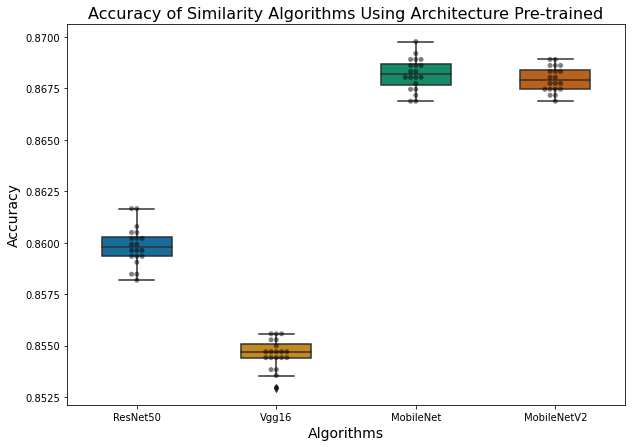

In [97]:
plt.figure(figsize=(10, 7))
bplot = sns.boxplot(data = df_acc[['ResNet50', 'Vgg16', 'MobileNet', 'MobileNetV2']], width=0.5, palette="colorblind")

bplot.axes.set_title("Accuracy of Similarity Algorithms Using Architecture Pre-trained", fontsize=16)
bplot.set_xlabel("Algorithms", fontsize=14)
bplot.set_ylabel("Accuracy", fontsize=14)
bplot.tick_params(labelsize=10)

# add swarmplot to boxplot with Seaborn
bplot=sns.swarmplot(data = df_acc[['ResNet50', 'Vgg16', 'MobileNet', 'MobileNetV2']], 
                   marker='o',
                   alpha=0.5,
                   color='black')

In [98]:
# output file name
plot_file_name=output_path+"boxplot_and_swarmplot_accuracy.jpg"

# save as jpeg
bplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

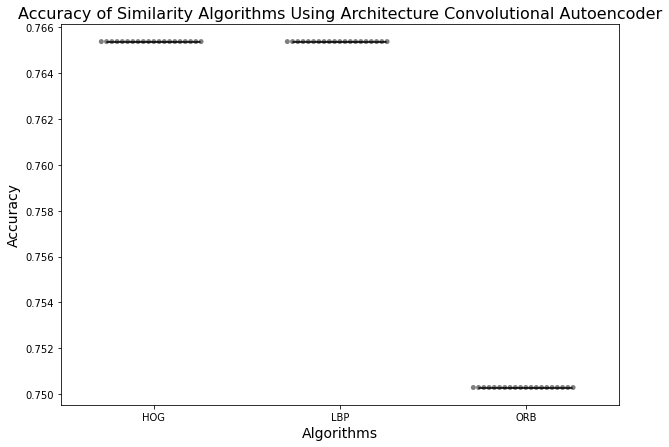

In [111]:
plt.figure(figsize=(10, 7))
bplot1 = sns.boxplot(data = df_acc[['HOG', 'LBP', 'ORB']], width=0.5, palette="colorblind")

bplot1.axes.set_title("Accuracy of Similarity Algorithms Using Architecture Convolutional Autoencoder", fontsize=16)
bplot1.set_xlabel("Algorithms", fontsize=14)
bplot1.set_ylabel("Accuracy", fontsize=14)
bplot1.tick_params(labelsize=10)

# add swarmplot to boxplot with Seaborn
bplot1=sns.swarmplot(data = df_acc[['HOG', 'LBP', 'ORB']], 
                   marker='o',
                   alpha=0.5,
                   color='black')

In [112]:
# output file name
plot_file_name=output_path+"boxplot_and_swarmplot_accuracy2.jpg"

# save as jpeg
bplot1.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [103]:
df_duration_resnet50 = pd.read_csv(output_path+'duration_resnet50.csv', names = ['ResNet50'], sep="\t")
df_duration_vgg16 = pd.read_csv(output_path+'duration_vgg16.csv',  names = ['Vgg16'],sep="\t")
df_duration_mobilenet = pd.read_csv(output_path+'duration_mobilenet.csv', names = ['MobileNet'],sep="\t")
df_duration_mobilenetv2 = pd.read_csv(output_path+'duration_mobilenetv2.csv',names = ['MobileNetV2'],sep="\t")

df_duration_hog = pd.read_csv(output_path+'duration_hog.csv',  names = ['HOG'],sep="\t")
df_duration_lbp = pd.read_csv(output_path+'duration_lbp.csv', names = ['LBP'],sep="\t")
df_duration_orb = pd.read_csv(output_path+'duration_orb.csv',names = ['ORB'],sep="\t")

df_duration = pd.concat([df_duration_resnet50, df_duration_vgg16,df_duration_mobilenet,df_duration_mobilenetv2, df_duration_hog, df_duration_lbp, df_duration_orb ], axis=1, join="inner")

In [108]:
df_duration

,ResNet50,Vgg16,MobileNet,MobileNetV2,HOG,LBP,ORB
0,359.471897,386.997386,369.087097,389.443043,38.211859,424.239110,6.650099
1,353.510399,368.549029,365.531461,368.595058,35.582711,423.224071,6.137873
2,361.132661,366.504789,365.368234,379.876235,31.384846,423.399020,6.160242
3,362.724344,360.959544,362.966024,361.971986,31.181205,422.637025,6.188862
4,357.004405,364.360277,361.163039,372.859034,31.339548,422.003082,6.167354
5,352.284464,367.311785,363.509294,360.251463,31.157372,422.286148,6.180527
6,352.062314,366.591127,363.774687,359.293272,31.309112,422.642074,6.202039
7,351.821855,365.751943,360.658052,362.406293,31.116332,423.231086,6.116482
8,353.493541,365.539588,361.048988,361.243935,31.145504,423.477042,6.061200
9,353.172679,364.768562,360.333089,359.390157,31.120764,424.749055,6.097171


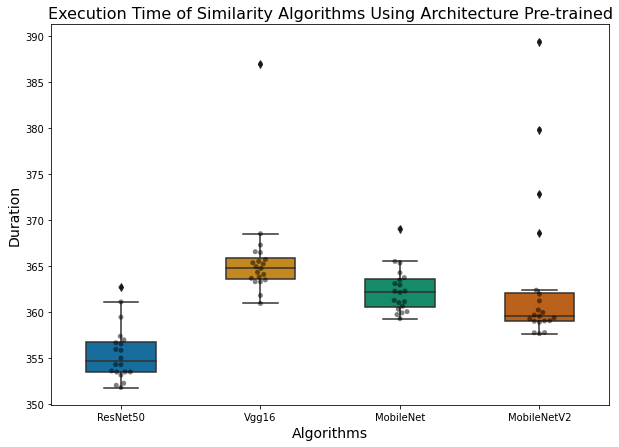

In [105]:
plt.figure(figsize=(10, 7))
bplot = sns.boxplot(data = df_duration[['ResNet50', 'Vgg16', 'MobileNet', 'MobileNetV2']], width=0.5, palette="colorblind")

bplot.axes.set_title("Execution Time of Similarity Algorithms Using Architecture Pre-trained", fontsize=16)
bplot.set_xlabel("Algorithms", fontsize=14)
bplot.set_ylabel("Duration", fontsize=14)
bplot.tick_params(labelsize=10)

# add swarmplot to boxplot with Seaborn
bplot=sns.swarmplot(data = df_duration[['ResNet50', 'Vgg16', 'MobileNet', 'MobileNetV2']], 
                   marker='o',
                   alpha=0.5,
                   color='black')

In [106]:
# output file name
plot_file_name=output_path+"boxplot_and_swarmplot_duration.jpg"

# save as jpeg
bplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

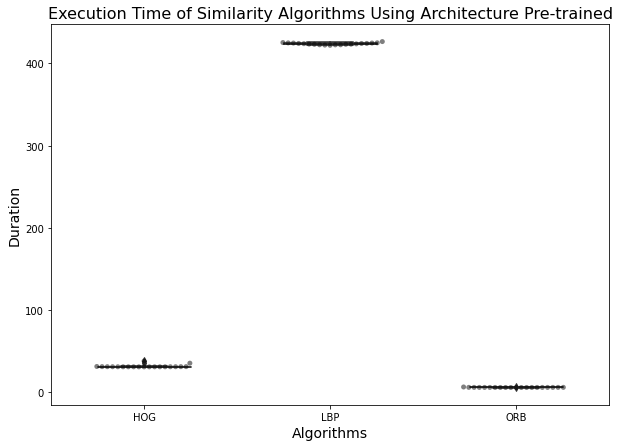

In [107]:
plt.figure(figsize=(10, 7))
bplot2 = sns.boxplot(data = df_duration[['HOG', 'LBP', 'ORB']], width=0.5, palette="colorblind")

bplot2.axes.set_title("Execution Time of Similarity Algorithms Using Architecture Convolutional Autoencoder", fontsize=16)
bplot2.set_xlabel("Algorithms", fontsize=14)
bplot2.set_ylabel("Duration", fontsize=14)
bplot2.tick_params(labelsize=10)

# add swarmplot to boxplot with Seaborn
bplot2=sns.swarmplot(data = df_duration[['HOG', 'LBP', 'ORB']], 
                   marker='o',
                   alpha=0.5,
                   color='black')

In [110]:
# output file name
plot_file_name=output_path+"boxplot_and_swarmplot_duration2.jpg"

# save as jpeg
bplot2.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

### Accuracy Statistic

Stats f_oneway functions takes the groups as input and returns F and P-value

In [116]:
fvalue, pvalue = stats.f_oneway(df_acc['ResNet50'], df_acc['Vgg16'], df_acc['MobileNet'], df_acc['MobileNetV2'],df_acc['HOG'], df_acc['LBP'], df_acc['ORB'])
print(fvalue, pvalue)

181266.55862708646 1.4834666847111374e-257


Get ANOVA table as R like output

In [118]:
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(df_acc.reset_index(), id_vars=['index'], value_vars=['ResNet50', 'Vgg16', 'MobileNet', 'MobileNetV2','HOG', 'LBP', 'ORB'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.364483,6.0,181266.558627,1.483467e-257
Residual,0.000045,133.0,NaN,NaN


Perform multiple pairwise comparison (Tukey HSD)

In [120]:
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
        HOG         LBP      0.0    0.9 -0.0005  0.0005  False
        HOG   MobileNet   0.1028  0.001  0.1023  0.1034   True
        HOG MobileNetV2   0.1026  0.001   0.102  0.1031   True
        HOG         ORB  -0.0151  0.001 -0.0156 -0.0145   True
        HOG    ResNet50   0.0945  0.001  0.0939   0.095   True
        HOG       Vgg16   0.0892  0.001  0.0887  0.0898   True
        LBP   MobileNet   0.1028  0.001  0.1023  0.1034   True
        LBP MobileNetV2   0.1026  0.001   0.102  0.1031   True
        LBP         ORB  -0.0151  0.001 -0.0156 -0.0145   True
        LBP    ResNet50   0.0945  0.001  0.0939   0.095   True
        LBP       Vgg16   0.0892  0.001  0.0887  0.0898   True
  MobileNet MobileNetV2  -0.0002 0.8062 -0.0008  0.0003  False
  MobileNet         ORB  -0.1179  0.001 -0.1185 -0.1174

### Execution Time Statistic

In [121]:
fvalue, pvalue = stats.f_oneway(df_duration['ResNet50'], df_duration['Vgg16'], df_duration['MobileNet'], df_duration['MobileNetV2'],df_duration['HOG'], df_duration['LBP'], df_duration['ORB'])
print(fvalue, pvalue)

36566.47055348996 2.4546929603212165e-211


Get ANOVA table as R like output

In [122]:
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(df_duration.reset_index(), id_vars=['index'], value_vars=['ResNet50', 'Vgg16', 'MobileNet', 'MobileNetV2','HOG', 'LBP', 'ORB'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3.674075e+06,6.0,36566.470553,2.454693e-211
Residual,2.227232e+03,133.0,NaN,NaN


Perform multiple pairwise comparison (Tukey HSD)

In [123]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------
        HOG         LBP  392.0655  0.001  388.1911  395.9398   True
        HOG   MobileNet  330.5982  0.001  326.7238  334.4725   True
        HOG MobileNetV2  331.3931  0.001  327.5188  335.2674   True
        HOG         ORB  -25.6661  0.001  -29.5404  -21.7918   True
        HOG    ResNet50  323.6943  0.001  319.8199  327.5686   True
        HOG       Vgg16  334.0279  0.001  330.1536  337.9023   True
        LBP   MobileNet  -61.4673  0.001  -65.3416   -57.593   True
        LBP MobileNetV2  -60.6724  0.001  -64.5467  -56.7981   True
        LBP         ORB -417.7316  0.001 -421.6059 -413.8573   True
        LBP    ResNet50  -68.3712  0.001  -72.2455  -64.4969   True
        LBP       Vgg16  -58.0376  0.001  -61.9119  -54.1632   True
  MobileNet MobileNetV2    0.7949    0.9   -3.07